In [1]:
from dask import delayed

In [7]:
@delayed
def add(a, b):
    result = a + b
    print(f"{a} + {b} = {result}")
    return a + b

In [8]:
x_p = add(1, 2)

In [9]:
type(x_p)

dask.delayed.Delayed

In [10]:
x_p.compute()

1 + 2 = 3


3

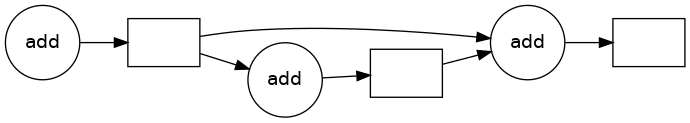

In [11]:
y_p = add(x_p, 3)
z_p = add(x_p, y_p)
z_p.visualize(rankdir = "LR")

In [16]:
x_p = add(1, 2)
y_p = add(x_p, 3)
z_p = add(x_p, -3)
z_p.visualize(rankdir = "LR")
z_p.compute()

1 + 2 = 3
3 + -3 = 0


0

In [18]:
x_p = add(1, 2)
y_p = add(x_p, 3)
z_p = add(x_p, y_p)
z_p.visualize(rankdir = "LR")
z_p.compute()

1 + 2 = 3
3 + 3 = 6
3 + 6 = 9


9

# Groundwork

In [28]:
@delayed
def add(*args):
    return sum(args)

In [29]:
add(1,2,3, 4)

Delayed('add-bac6fab7-868e-4ccf-b1e2-78ca141e1156')

In [30]:
@delayed
def gather(*args):
    return list(args)

# Turn a list of promises into the promise of a list

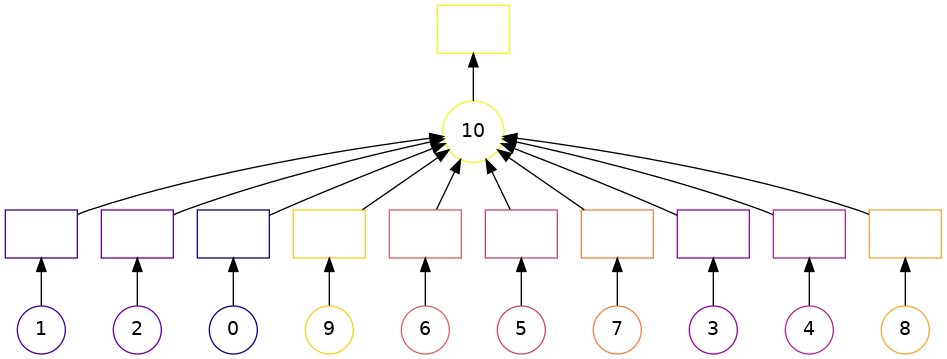

In [36]:
x_p = gather(*(add(n, n) for n in range(10)))
x_p.visualize(color="order")

In [34]:
x_p.compute()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

# Please write a delayed function that computes the mean of more than two numbers

In [38]:
@delayed
def mean(*args):
    return sum(args)/len(args)

In [39]:
m_p = mean(1,2,3,4)
m_p.compute()

2.5

In [48]:
import random
import numba

In [49]:
@numba.jit(nogil = True)
def calc_pi_numba(N):
    M = 0
    for i in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        dist = x**2 + y**2
        if dist < 1:
            M += 1
    return 4*M/N

In [55]:
%timeit calc_pi_numba(10**8)

923 ms ± 7.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
N = 10**8
pi_p = mean(*(delayed(calc_pi_numba)(N) for _ in range(3)))
pi_p.compute()

3.1416252666666664

In [57]:
%timeit pi_p.compute()

1.07 s ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
